# Phonetics of additive particle in Chuvash

The aim of the project is to find out whether Chuvash particle *da*, which is considered clitic, is realized differently from *-da* that is a word ending.

As a data, I had speech recordings of 4 Chuvash speakers (not much, but not bad for starters). Their assignment was to read out loud 35-40 sentences, each of them had either a *-da*-ending word or a *da* as a particle. Each sentence was to be read 3 times, so there are 420 utterances of target phonetic words in total. Besides that, the additive particle has different meanings, and each meaning was marked additionally, that is why there are 4 groups of words in the data: no-partical words and 3 different meanings for *da* (in case they are also realized differently).

Since, it is not, in fact, clear what kind of stress is inherent in Chuvash (if any -- it is an open question), I decided to compare two simple parameters: vowel duration and vowel height of ultimate and penultimate vowels, both variables are numeric (for height, F1 values were taken). Only the last two vowels are taken into account, because traditionally the last vowel is considered stressed -- and it will be the basis of further comarison.

All the data were annotated manually in PRAAT, and then converted to the csv-file below by means of PRAAT script.

In [3]:
import pandas as pd

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('results_fin_py_project.csv')

In [20]:
df

,word,group,F1_previous,dur_previous,F1_last,dur_last,speaker,rel_dur_prcnt,rel_F1_prcnt
0,??bada,1,750,0.104220,720,0.112862,PorPorf,92.342713,104.166667
1,??bada,1,750,0.094387,630,0.082574,PorPorf,114.306907,119.047619
2,??bada,1,660,0.076714,610,0.074427,PorPorf,103.073097,108.196721
3,??bada,1,640,0.100435,670,0.099800,PorPorf,100.636325,95.522388
4,??bada,1,750,0.088695,730,0.087200,PorPorf,101.714101,102.739726
...,...,...,...,...,...,...,...,...,...
416,xəda=da,4,669,0.113840,590,0.080136,RozNik,142.058440,113.389831
417,xəda=da,4,638,0.117374,633,0.072174,RozNik,162.627028,100.789889
418,ʨosta=da,4,648,0.077659,607,0.070655,RozNik,109.913240,106.754530
419,ʨosta=da,4,613,0.074828,560,0.080782,RozNik,92.629067,109.464286


As was already said, the last vowel (whether it is a part of the word itself or a particle attached to it) is considered the basis, and the last two columns are relative duration and height of penultimate vowels respectively (in percent; i.e. *penultimate vowel duration/ultimate vowel duration* and *penultimate vowel height/ultimate vowel height*).

Let's take a look at whether there is any difference between vowel duration.

In [7]:
%matplotlib inline

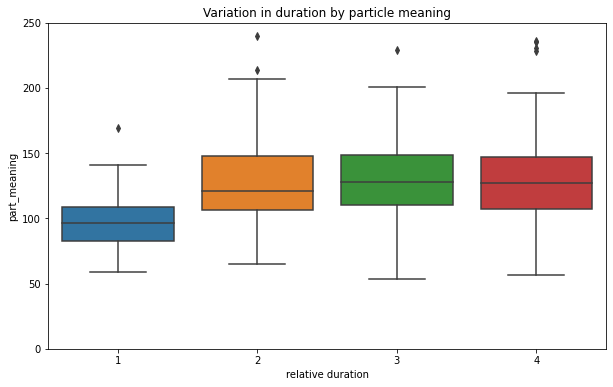

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="group", y="rel_dur_prcnt", data=df)
plt.ylim((0, 250))
plt.title('Variation in duration by particle meaning')
plt.ylabel('part_meaning')
plt.xlabel('relative duration');

Here, we can see that the 1st group (without a particle) differs from the other three: the last two vowels there do not differ as much as in 'particle' words -- the latter ones tend to have shorter particle vowels (since the penultimate syllable is longer).

Next, let's take a look at the vowel height (or vowel type/quality).

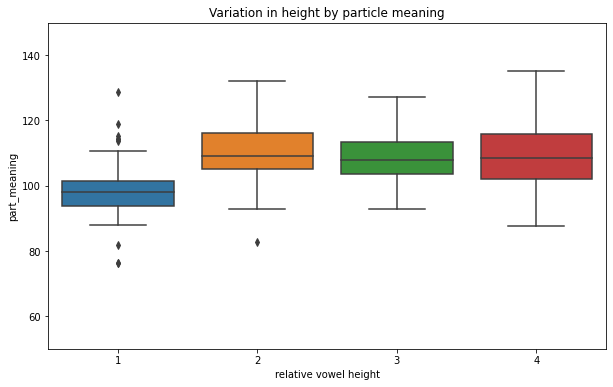

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="group", y="rel_F1_prcnt", data=df)
plt.ylim((50, 150))
plt.title('Variation in height by particle meaning')
plt.ylabel('part_meaning')
plt.xlabel('relative vowel height');

Here, the situation is similar: the 1st group (no particle) differs from the other three again. In the 'partical' groups penultimate vowels are lower (more *a*-like) than the ones in *da*.

Thus, we see that the vowel in the additive particle are usually shorter and more closed than the last vowels of the words to which the particle is attached.

Let's run some tests to support this conclusion. Since the independent variable is categorical with more than two levels (four) and the dependent one is numeric in both cases (duration and height), ANOVA seems to be suitable.

The first run is for duration:

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [14]:
model = ols("rel_dur_prcnt ~ C(group)", data = df).fit()

In [15]:
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(group),88573.359623,3.0,32.92684,4.051644e-19
Residual,373910.681019,417.0,NaN,NaN


Null hypothesis is that no group is different from another. Alternative one is that at least on of them is different. Here, we see that *p-value* (PR(>F)) is less than 0.05, which means we deny *H_0* when talking about vowel duration (the boxplot showed which group is different).

Below, I run the test for vowel height:

In [18]:
model_F = ols("rel_F1_prcnt ~ C(group)", data = df).fit()

In [19]:
aov_table_F = sm.stats.anova_lm(model_F, typ=2)
aov_table_F

,sum_sq,df,F,PR(>F)
C(group),9664.314431,3.0,46.409126,6.735134e-26
Residual,28945.593923,417.0,NaN,NaN


Here, *H_0* can also be denied: one of the groups is statistically significantly different from the others.

Thus, Chuvash additive particle *da* is indeed realized differently from *da*-ending words.